## STIMULUS INFORMATION FROM TUNING CURVES

### Tuning curves are plots of neuron firing rates with respect to stimulus parameters. 
### The purpose of this exercise is to identify which part of the tuning curve is the most information about a stimulus encoded.
### Entropy and Mutual information are concepts from information theory that are used to answer this question.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import ipywidgets as widget
import warnings
from ipywidgets import interact_manual, FloatSlider, IntSlider

plt.rcParams['figure.dpi'] = 300
%matplotlib inline
warnings.filterwarnings('ignore')

#### def get_response_firing() gives the response of a single neuron tuned to an "oriented_angle" between 0-180 degrees.

#### sample the neuron response using num_samples

#### noise represents the noise factor corresponding to background firing activity that is partly stimulus independent.

In [2]:
def get_response_firing(num_samples,theta_max,  noise=0):
    thetas = np.random.randint(-90, 90, size = num_samples)
    exp_data = np.zeros(shape = (num_samples, 2))
    exp_data[:, 0] = thetas
    responses = np.cos((thetas * np.pi/180)*1.5 - (theta_max * np.pi/180) - 0.14)/0.86
    responses[responses < 0] = 0 
    for i in range(num_samples):
        exp_data[i, 1] = np.random.normal(loc = responses[i],
                                       scale = 0.048 * noise + (0.052 * responses[i]) * noise, 
                                       size = 1)

    exp_data[:, 1][exp_data[:, 1] < 0.0] = 0.0
    return exp_data

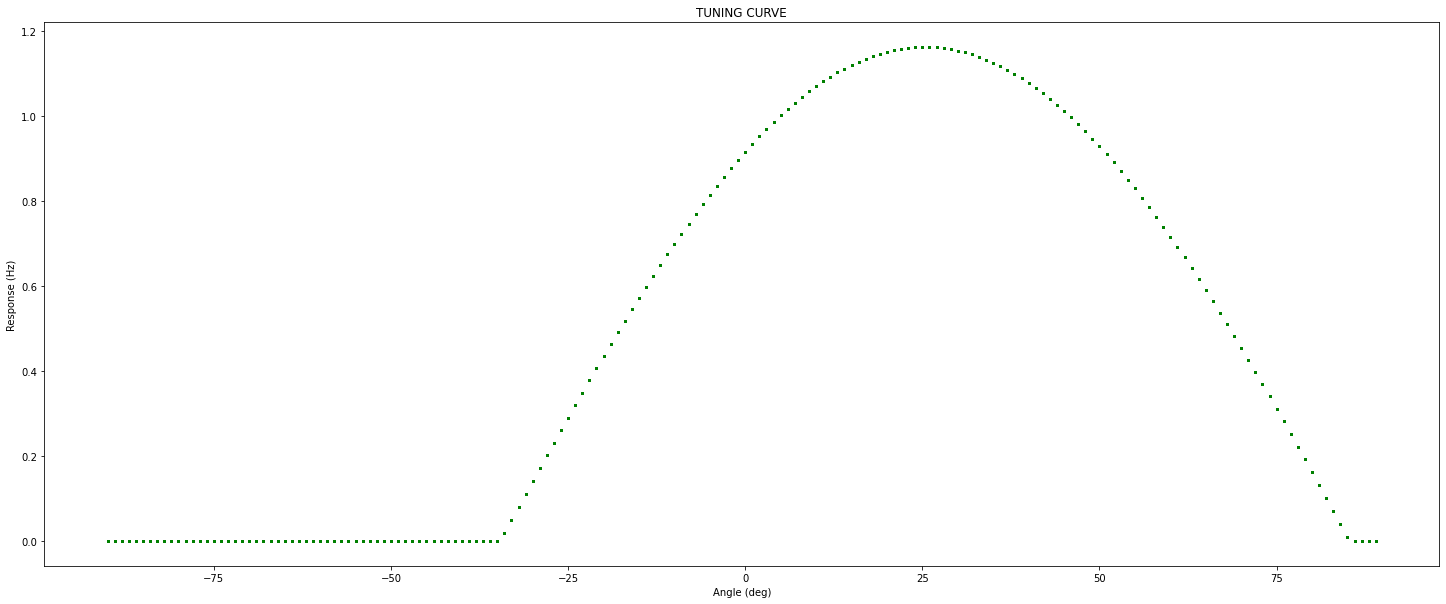

In [3]:
fig, ax = plt.subplots(figsize = (25, 10))

###Sample the responses from the neuron
num_samples = 1000000
oriented_angle = 30
A = 0
neuron_response = get_response_firing(num_samples,oriented_angle,A) # data from neuron 1
theta = neuron_response[:, 0]
response = neuron_response[:, 1]
# plot responses for different stimuli
ax.scatter(theta, response, color = 'g', s = 1)
ax.set_xlabel("Angle (deg)")
ax.set_ylabel("Response (Hz)")
ax.set_title('TUNING CURVE')
plt.show()

#### SI(response) = H[theta] - H[theta|r]

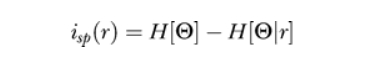

##### Specific Information of a response is defined as difference between the entropy of the stimulus ensemble and the entropy of the stimulus conditioned on the particular response. This gives us the reduction in uncertainity about a stimulus gained by a particular response [D. A. Butts and M. S. Goldman, “Tuning curves, neuronal variability, and sensory coding,” PLoS Biol., vol. 4, no. 4, p. e92, 2006.](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.0040092#sd001)


##### TODO compute the distribution of stimulus and response

In [4]:
counts_responses, r_bins = np.histogram(response,bins=90)

counts_theta, theta_bins = np.histogram(theta,bins=50)

In [5]:
def prob_a_and_b(a,b,a_bins,b_bins):
    '''
    input: random variable a (vector)
           random variable b (vector)
           discrete intervals of a
           discrete intervals of b
    output: 2D array of counts of intersection of a and b

    '''
    
    p = np.zeros(shape = (len(a_bins), len(b_bins)))
    '''
    YOUR CODE HERE 
    p is a 2d array having all a_bins for rows and b_bins for cols with counts of their intersection as values
    '''
    p,x,y=np.histogram2d(a,b,bins=[a_bins,b_bins])
    return p

'''
pass relevant parameters to compute conditional probabilities on theta and response
'''
count_table=prob_a_and_b(response,theta,r_bins,theta_bins)
count_table

array([[21975., 22159., 16698., ...,     0.,  5565., 22227.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [6]:
def p_a_given_b(count_table,num_samples,p_b):
    '''
    input : 2D table containing the counts of random variables a and b along the 2 axes
            num of samples
            probability of random variable b (vector of len(b))

    output : p(a|b) for all b
    '''
    res= np.zeros((count_table.shape[0],count_table.shape[1]))
    p_b=p_b/num_samples
    for i in range(count_table.shape[0]):
        for j in range(count_table.shape[1]):
            if p_b[j] != 0.0:
                res[i][j]=count_table[i][j]/p_b[j]*count_table.sum() 
    '''
    
    YOUR CODE HERE
    
    '''
    return res
probagivenb = p_a_given_b(count_table,10000,counts_responses)
probagivenb

array([[6.49582907e+08, 3.97328313e+10, 0.00000000e+00, ...,
        0.00000000e+00, 1.01292319e+10, 4.06269421e+10],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [7]:
def H(prob):
    '''YOUR CODE HERE'''
    h=-sum(p*np.log(p+1e-1) for p in prob)
    return h

#### Calculate and plot Specific Information

In [8]:
H_theta = H(counts_theta)
H_theta_given_r = H(p_a_given_b(count_table,num_samples,counts_responses))
H_theta_given_r

array([-1.61726729e+12, -1.15267383e+14, -0.00000000e+00, -5.79604572e+13,
       -0.00000000e+00, -1.16493807e+14, -1.16422488e+14, -8.30238480e+13,
       -1.16405697e+14, -0.00000000e+00, -5.72631196e+13, -0.00000000e+00,
       -1.18162432e+14, -1.20048419e+14, -8.68087851e+13, -1.11900328e+14,
       -0.00000000e+00, -5.27200151e+13, -0.00000000e+00, -8.13374252e+13,
       -1.13165295e+14, -8.32501072e+13, -1.12901872e+14, -0.00000000e+00,
       -5.28242494e+13, -0.00000000e+00, -8.22242351e+13, -1.09898100e+14,
       -8.37866889e+13, -1.13449381e+14, -8.29902224e+13, -1.16042224e+14,
       -0.00000000e+00, -4.29027435e+13, -0.00000000e+00, -4.10995835e+13,
       -0.00000000e+00, -1.09924601e+14, -8.18935038e+13, -1.11263658e+14,
       -8.14192636e+13, -1.10641784e+14, -8.14593845e+13, -1.12568913e+14,
       -1.12025722e+14, -8.31931612e+13, -1.10401192e+14, -8.20633539e+13,
       -1.12129919e+14, -1.17951662e+14])

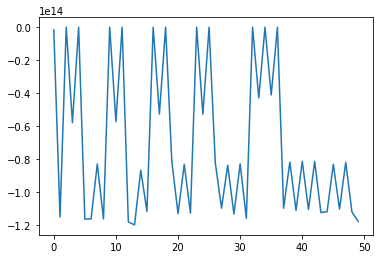

In [9]:
si =H_theta_given_r
plt.plot(si)

### SSI is the average specific information of the responses that occur when a particular stimulus θ is present.

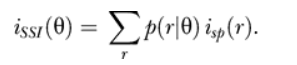

##### [D. A. Butts and M. S. Goldman, “Tuning curves, neuronal variability, and sensory coding,” PLoS Biol., vol. 4, no. 4, p. e92, 2006.](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.0040092#sd001)


##### TODO Compute and plot SSI for each theta presented as stimulus 

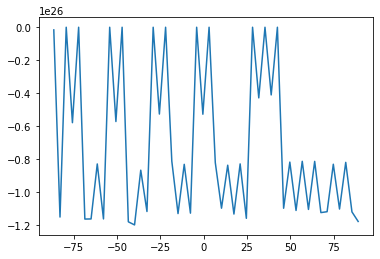

In [21]:
ssi=sum(p_a_given_b(count_table,num_samples,counts_theta)*si)
plt.plot(theta_bins[1:51],ssi)

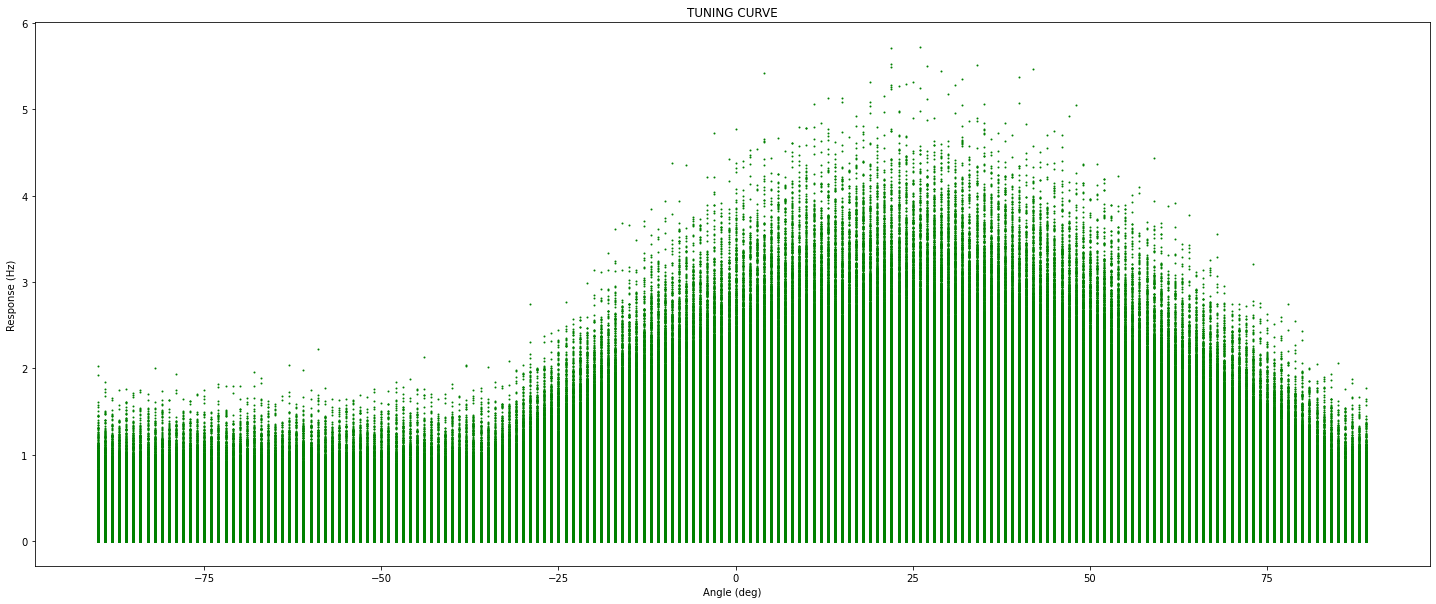

In [22]:
fig, ax = plt.subplots(figsize = (25, 10))

###Sample the responses from the neuron
num_samples = 1000000
oriented_angle = 30
A = 10
neuron_response = get_response_firing(num_samples,oriented_angle,A) # data from neuron 1
theta = neuron_response[:, 0]
response = neuron_response[:, 1]
# plot responses for different stimuli
ax.scatter(theta, response, color = 'g', s = 1)
ax.set_xlabel("Angle (deg)")
ax.set_ylabel("Response (Hz)")
ax.set_title('TUNING CURVE')
plt.show()

In [23]:
counts_responses, r_bins = np.histogram(response,bins=90)

counts_theta, theta_bins = np.histogram(theta,bins=50)

In [24]:
def prob_a_and_b(a,b,a_bins,b_bins):
    '''
    input: random variable a (vector)
           random variable b (vector)
           discrete intervals of a
           discrete intervals of b
    output: 2D array of counts of intersection of a and b

    '''
    
    p = np.zeros(shape = (len(a_bins), len(b_bins)))
    '''
    YOUR CODE HERE 
    p is a 2d array having all a_bins for rows and b_bins for cols with counts of their intersection as values
    '''
    p,x,y=np.histogram2d(a,b,bins=[a_bins,b_bins])
    return p

'''
pass relevant parameters to compute conditional probabilities on theta and response
'''
count_table=prob_a_and_b(response,theta,r_bins,theta_bins)
count_table

array([[12315., 12250.,  9264., ...,  7124., 11185., 12192.],
       [ 1096.,  1194.,   881., ...,   781.,  1129.,  1181.],
       [ 1122.,  1088.,   833., ...,   810.,  1062.,  1047.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [25]:
def p_a_given_b(count_table,num_samples,p_b):
    '''
    input : 2D table containing the counts of random variables a and b along the 2 axes
            num of samples
            probability of random variable b (vector of len(b))

    output : p(a|b) for all b
    '''
    res= np.zeros((count_table.shape[0],count_table.shape[1]))
    p_b=p_b/num_samples
    for i in range(count_table.shape[0]):
        for j in range(count_table.shape[1]):
            if p_b[j] != 0.0:
                res[i][j]=count_table[i][j]/p_b[j]*count_table.sum() 
    '''
    
    YOUR CODE HERE
    
    '''
    return res
probagivenb = p_a_given_b(count_table,10000,counts_responses)
probagivenb

array([[3.54445609e+08, 3.61410237e+09, 2.72904024e+09, ...,
        5.13626532e+10, 8.99115756e+10, 1.11955923e+11],
       [3.15446518e+07, 3.52264346e+08, 2.59529842e+08, ...,
        5.63085797e+09, 9.07556270e+09, 1.08448118e+10],
       [3.22929738e+07, 3.20991297e+08, 2.45389737e+08, ...,
        5.83994232e+09, 8.53697749e+09, 9.61432507e+09],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [26]:
def H(prob):
    '''YOUR CODE HERE'''
    h=-sum(p*np.log(p+1e-1) for p in prob)
    return h

In [27]:
H_theta = H(counts_theta)
H_theta_given_r = H(p_a_given_b(count_table,num_samples,counts_responses))
H_theta_given_r

array([-1.48085188e+12, -1.65937687e+13, -1.23574903e+13, -1.68661205e+13,
       -1.26879253e+13, -1.76493519e+13, -1.88057894e+13, -1.44432100e+13,
       -2.05278539e+13, -1.60563066e+13, -2.30665337e+13, -1.81841835e+13,
       -2.62099845e+13, -2.76252522e+13, -2.25556686e+13, -3.22404532e+13,
       -2.44531320e+13, -3.46411332e+13, -3.71888933e+13, -2.91003312e+13,
       -4.20864904e+13, -3.25214116e+13, -4.54496480e+13, -3.59459430e+13,
       -5.06495764e+13, -5.45903296e+13, -4.37988828e+13, -6.26320721e+13,
       -4.89642347e+13, -7.06255171e+13, -5.62773703e+13, -8.30407078e+13,
       -8.82154979e+13, -7.11595817e+13, -1.03679917e+14, -8.68336080e+13,
       -1.30095941e+14, -1.42057343e+14, -1.14521699e+14, -1.75987408e+14,
       -1.42495352e+14, -2.13322986e+14, -1.71963822e+14, -2.66994821e+14,
       -3.06952080e+14, -2.52703988e+14, -3.97206860e+14, -3.32458796e+14,
       -5.05825421e+14, -5.85968175e+14])

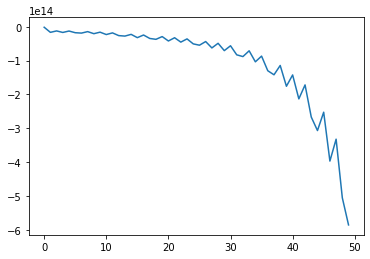

In [28]:
si =H_theta_given_r
plt.plot(si)

In [29]:
H_theta = H(counts_theta)
H_theta_given_r = H(p_a_given_b(count_table,num_samples,counts_responses))
H_theta_given_r

array([-1.48085188e+12, -1.65937687e+13, -1.23574903e+13, -1.68661205e+13,
       -1.26879253e+13, -1.76493519e+13, -1.88057894e+13, -1.44432100e+13,
       -2.05278539e+13, -1.60563066e+13, -2.30665337e+13, -1.81841835e+13,
       -2.62099845e+13, -2.76252522e+13, -2.25556686e+13, -3.22404532e+13,
       -2.44531320e+13, -3.46411332e+13, -3.71888933e+13, -2.91003312e+13,
       -4.20864904e+13, -3.25214116e+13, -4.54496480e+13, -3.59459430e+13,
       -5.06495764e+13, -5.45903296e+13, -4.37988828e+13, -6.26320721e+13,
       -4.89642347e+13, -7.06255171e+13, -5.62773703e+13, -8.30407078e+13,
       -8.82154979e+13, -7.11595817e+13, -1.03679917e+14, -8.68336080e+13,
       -1.30095941e+14, -1.42057343e+14, -1.14521699e+14, -1.75987408e+14,
       -1.42495352e+14, -2.13322986e+14, -1.71963822e+14, -2.66994821e+14,
       -3.06952080e+14, -2.52703988e+14, -3.97206860e+14, -3.32458796e+14,
       -5.05825421e+14, -5.85968175e+14])

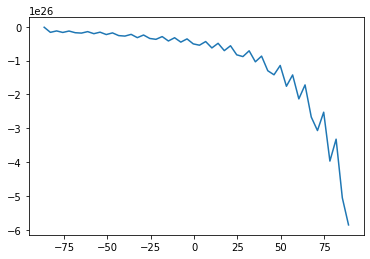

In [30]:
ssi=sum(p_a_given_b(count_table,num_samples,counts_theta)*si)
plt.plot(theta_bins[1:51],ssi)

### QUESTIONS

#### 1. What are your observations from the graph?
#### 2. which part of the tuning curve contains the most information about the stimulus?
#### 3. What are the observations for a response with low noise v/s high noise ?


### Answers

#### 1. What are your observations from the graph?
Tuning curves gives MI. Changes with noise
#### 2. which part of the tuning curve contains the most information about the stimulus?
High entropy(low probablity) regions give most information
#### 3. What are the observations for a response with low noise v/s high noise ?
If a high noise is present, it is difficult to calculate entropy and MI.